<a href="https://colab.research.google.com/github/AUTO-KKYU/DL/blob/main/Mask_on_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

In [ ]:
!unzip -qq "/content/drive/MyDrive/archive.zip"

replace Face Mask Dataset/Test/WithMask/1163.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1174.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace Face Mask Dataset/Test/WithMask/1174.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace Face Mask Dataset/Test/WithMask/1174.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1175.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1203.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1361.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1362.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1363.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test/WithMask/1388.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Face Mask Dataset/Test

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/Face Mask Dataset/'
dataset = {
    "image_path" : [],
    "mask_status" : [],
    "where" : []
}

for where in os.listdir(path):
    for status in os.listdir(path + "/" + where):
        for image in glob.glob(path + where + "/" + status + "/*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Test/WithoutMask/99...,WithoutMask,Test
1,/content/Face Mask Dataset/Test/WithoutMask/19...,WithoutMask,Test
2,/content/Face Mask Dataset/Test/WithoutMask/80...,WithoutMask,Test
3,/content/Face Mask Dataset/Test/WithoutMask/35...,WithoutMask,Test
4,/content/Face Mask Dataset/Test/WithoutMask/25...,WithoutMask,Test


With Mask: 5909
Without Mask :  5883


<ipython-input-42-bea2c6d14cdb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["mask_status"], palette="pastel")


<Axes: xlabel='mask_status', ylabel='count'>

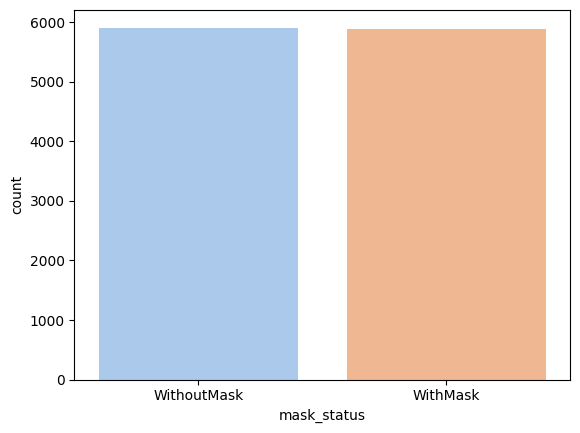

In [ ]:
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask : ", dataset.value_counts("mask_status")[1])

sns.countplot(x=dataset["mask_status"], palette="pastel")

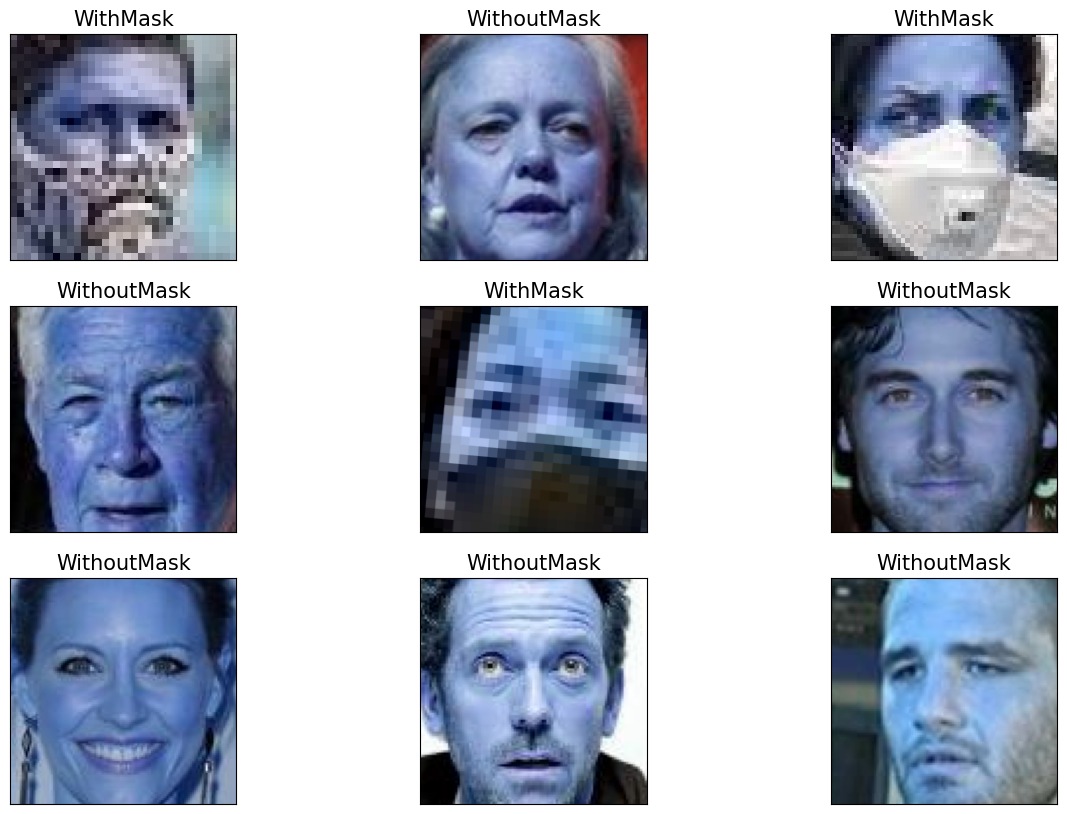

In [ ]:
import cv2

plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
    plt.title(dataset.loc[random, "mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [ ]:
train_df = dataset[dataset["where"] == "Train" ]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                             image_path  mask_status  where
1792  /content/Face Mask Dataset/Train/WithoutMask/1...  WithoutMask  Train
1793  /content/Face Mask Dataset/Train/WithoutMask/5...  WithoutMask  Train
1794  /content/Face Mask Dataset/Train/WithoutMask/3...  WithoutMask  Train
1795  /content/Face Mask Dataset/Train/WithoutMask/3...  WithoutMask  Train
1796  /content/Face Mask Dataset/Train/WithoutMask/1...  WithoutMask  Train
1797  /content/Face Mask Dataset/Train/WithoutMask/2...  WithoutMask  Train
1798  /content/Face Mask Dataset/Train/WithoutMask/2...  WithoutMask  Train
1799  /content/Face Mask Dataset/Train/WithoutMask/3...  WithoutMask  Train
1800  /content/Face Mask Dataset/Train/WithoutMask/2...  WithoutMask  Train
1801  /content/Face Mask Dataset/Train/WithoutMask/1...  WithoutMask  Train


<ipython-input-45-20029026dba1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = train_df["mask_status"], palette="pastel")
<ipython-input-45-20029026dba1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = test_df["mask_status"], palette="pastel")
<ipython-input-45-20029026dba1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = valid_df["mask_status"], palette="pastel")


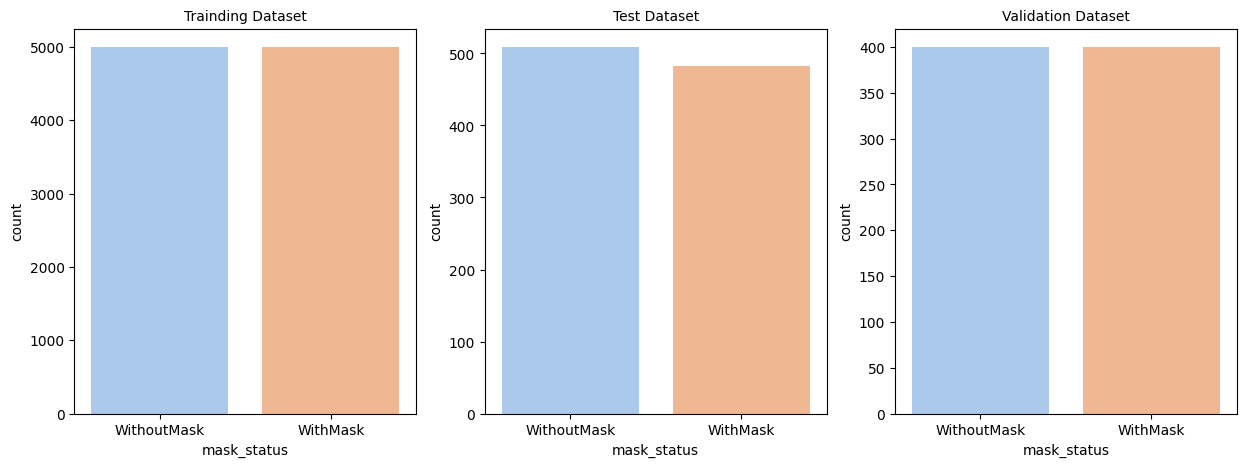

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"], palette="pastel")
plt.title("Trainding Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"], palette="pastel")
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"], palette="pastel")
plt.title("Validation Dataset", size = 10)

plt.show()

In [ ]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithoutMask/1...,WithoutMask,Train
1,/content/Face Mask Dataset/Train/WithoutMask/5...,WithoutMask,Train
2,/content/Face Mask Dataset/Train/WithoutMask/3...,WithoutMask,Train
3,/content/Face Mask Dataset/Train/WithoutMask/3...,WithoutMask,Train
4,/content/Face Mask Dataset/Train/WithoutMask/1...,WithoutMask,Train


In [ ]:
data = []
image_size = 150

for i in range(len(train_df)):
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

    new_image_array = cv2.resize(img_array, (image_size, image_size))

    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [ ]:
data[0]

[array([[254, 253, 250, ...,  58,  54,  51],
        [254, 253, 250, ...,  61,  56,  52],
        [253, 251, 249, ...,  64,  59,  54],
        ...,
        [255, 255, 255, ..., 253, 253, 253],
        [255, 255, 255, ..., 253, 253, 253],
        [255, 255, 255, ..., 253, 253, 253]], dtype=uint8),
 0]

In [ ]:
data = np.array(data, dtype = object)
type(data)

numpy.ndarray

In [ ]:
np.random.shuffle(data)

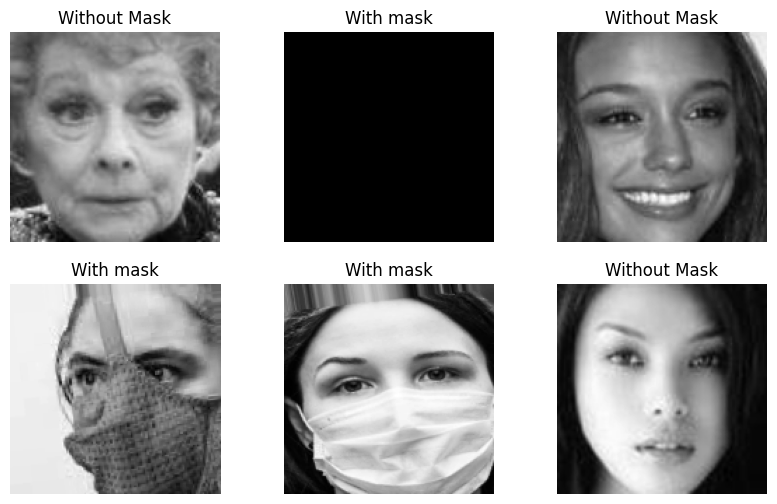

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6))

for row in range(2):
    for col in range(3):
        image_index = row*100 + col

        ax[row, col].axis("off")
        ax[row, col].imshow(data[image_index][0], cmap = "gray")

        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With mask")

plt.show()

In [ ]:
data[0]

array([array([[102, 100,  97, ..., 116, 116, 117],
              [101,  99,  97, ..., 117, 117, 117],
              [101,  99,  96, ..., 119, 118, 117],
              ...,
              [ 73, 109, 145, ..., 119, 112, 107],
              [ 72,  92, 114, ...,  99, 101, 105],
              [ 76,  76,  81, ...,  83,  92, 102]], dtype=uint8), 0],
      dtype=object)

In [ ]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 13)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
                            layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (150,150,1)),
                            layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
                            layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'),
                            layers.MaxPooling2D(pool_size = (2, 2)),
                            layers.Dropout(0.25),
                            layers.Flatten(),
                            layers.Dense(1000, activation = 'relu'),
                            layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 87616)            

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
250/250 [==============================] - 13s 47ms/step - loss: 40.8995 - accuracy: 0.8992
Epoch 2/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0799 - accuracy: 0.9700
Epoch 3/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0534 - accuracy: 0.9820
Epoch 4/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0365 - accuracy: 0.9871
Epoch 5/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0395 - accuracy: 0.9858


In [ ]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 1s 8ms/step - loss: 0.1238 - accuracy: 0.9625


[0.12376964837312698, 0.9624999761581421]

In [ ]:
prediction = model.predict(X_val)
from sklearn.preprocessing import binarize
prediction = binarize(prediction, threshold=0.5)
print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       990
           1       0.95      0.98      0.96      1010

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

[[933  57]
 [ 18 992]]


In [ ]:
model2 = models.Sequential([
                            layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (150,150,1)),
                            layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
                            layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'),
                            layers.MaxPooling2D(pool_size = (2, 2)),
                            layers.Dropout(0.25),
                            layers.Flatten(),
                            layers.Dense(1000, activation = 'relu'),
                            layers.Dense(1, activation = 'sigmoid')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 87616)            

In [ ]:
model2.compile(optimizer = 'adam',
               loss = tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy'])

In [ ]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

X = X / 255

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 13)

X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model2.fit(X_train, y_train, epochs = 5, batch_size = 32)

In [ ]:
model2.evaluate(X_val, y_val)

In [ ]:
prediction2 = model2.predict(X_val)
from sklearn.preprocessing import binarize
prediction2 = binarize(prediction2, threshold=0.5)
print(classification_report(y_val, prediction2))
print(confusion_matrix(y_val, prediction2))

In [ ]:
wrong_result = []

for n in range(0, len(y_val)):
    if prediction[n] != y_val[n]:
        wrong_result.append(n)

len(wrong_result)

In [ ]:
import random

samples = random.choices(population = wrong_result, k = 6)

plt.figure(figsize = (14, 12))

for idx, n in enumerate(samples):
    plt.subplot(3, 2, idx+1)
    plt.imshow(X_val[n].reshape(150,150), interpolation = 'nearest')
    plt.title(prediction[n])
    plt.axis('off')

plt.show()